In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [2]:
# Load dataset (we're only using VALIDATION set as our data)
original_df = pd.read_parquet('dataset/316_v4_validation.parquet')

In [3]:
original_df.head(5)

,era,data_type,feature_honoured_observational_balaamite,feature_polaroid_vadose_quinze,feature_untidy_withdrawn_bargeman,feature_genuine_kyphotic_trehala,feature_unenthralled_sportful_schoolhouse,feature_divulsive_explanatory_ideologue,feature_ichthyotic_roofed_yeshiva,feature_waggly_outlandish_carbonisation,...,target_paul_v4_20,target_paul_v4_60,target_george_v4_20,target_george_v4_60,target_william_v4_20,target_william_v4_60,target_arthur_v4_20,target_arthur_v4_60,target_thomas_v4_20,target_thomas_v4_60
id,,,,,,,,,,,,,,,,,,,,,
n000101811a8a843,0575,validation,0.50,0.0,1.0,0.00,0.75,0.00,1.00,0.25,...,0.50,0.50,0.50,0.50,0.666667,0.500000,0.500000,0.500000,0.666667,0.500000
n001e1318d5072ac,0575,validation,0.25,1.0,0.5,0.50,0.25,0.75,0.75,0.00,...,0.00,0.25,0.00,0.50,0.166667,0.333333,0.333333,0.166667,0.166667,0.333333
n002a9c5ab785cbb,0575,validation,0.25,0.5,0.5,0.75,0.25,0.25,0.75,0.00,...,0.50,0.75,0.50,0.75,0.500000,0.666667,0.500000,0.666667,0.500000,0.666667
n002ccf6d0e8c5ad,0575,validation,0.50,1.0,0.5,1.00,0.50,1.00,0.75,0.50,...,0.25,0.00,0.25,0.00,0.166667,0.166667,0.333333,0.500000,0.333333,0.166667
n0051ab821295c29,0575,validation,0.50,0.0,0.0,0.25,0.00,1.00,0.50,0.25,...,0.50,0.50,0.50,0.50,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


In [4]:
# era_df = original_df.loc[(original_df.era == '0579') | (original_df.era == '0615')]   # Looking at these two for now
era_df = original_df.loc[original_df.era == '0575']   # Looking at these two for now
features = [f for f in list(original_df) if 'feature' in f]    # Getting feature columns
targets = [t for t in list(original_df) if 'target' in t]      # Getting target columns

In [5]:
era_df = era_df.dropna()   # Dropping null data

In [31]:
import statsmodels.api as sm

# Predictor variables (all the features names)
X = era_df[features]

ssr_list = []
for i in range(len(targets)):
    # Testing on this target for now
    y = era_df[targets[i]]
    # Add constant (bias) to predictor variables 
    X = sm.add_constant(X)

    ols_model = sm.OLS(y, X).fit()

    # Display summary
    # print(ols_model.summary())

    # # Residual Sum of Squres
    # print(targets[i])
    ssr_list.append(ols_model.ssr)

ssr_complete_list = list(zip(targets, ssr_list))
ssr_df = pd.DataFrame(ssr_complete_list, columns=['Targets', 'SSR'])
ssr_df



,Targets,SSR
0,target,168.539380
1,target_nomi_v4_20,168.539380
2,target_nomi_v4_60,173.903545
3,target_jerome_v4_20,163.536295
4,target_jerome_v4_60,168.896408
5,target_janet_v4_20,210.200072
6,target_janet_v4_60,210.863134
7,target_ben_v4_20,168.445451
8,target_ben_v4_60,166.824076
9,target_alan_v4_20,207.575169


In [32]:
print(ols_model.summary())    # Looking at the summary for the last target -- 'target_thomas_v4_60' 

                             OLS Regression Results                            
Dep. Variable:     target_thomas_v4_60   R-squared:                       0.283
Model:                             OLS   Adj. R-squared:                  0.045
Method:                  Least Squares   F-statistic:                     1.188
Date:                 Thu, 19 May 2022   Prob (F-statistic):           0.000106
Time:                         11:35:31   Log-Likelihood:                 1997.2
No. Observations:                 4777   AIC:                            -1610.
Df Residuals:                     3585   BIC:                             6104.
Df Model:                         1191                                         
Covariance Type:             nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

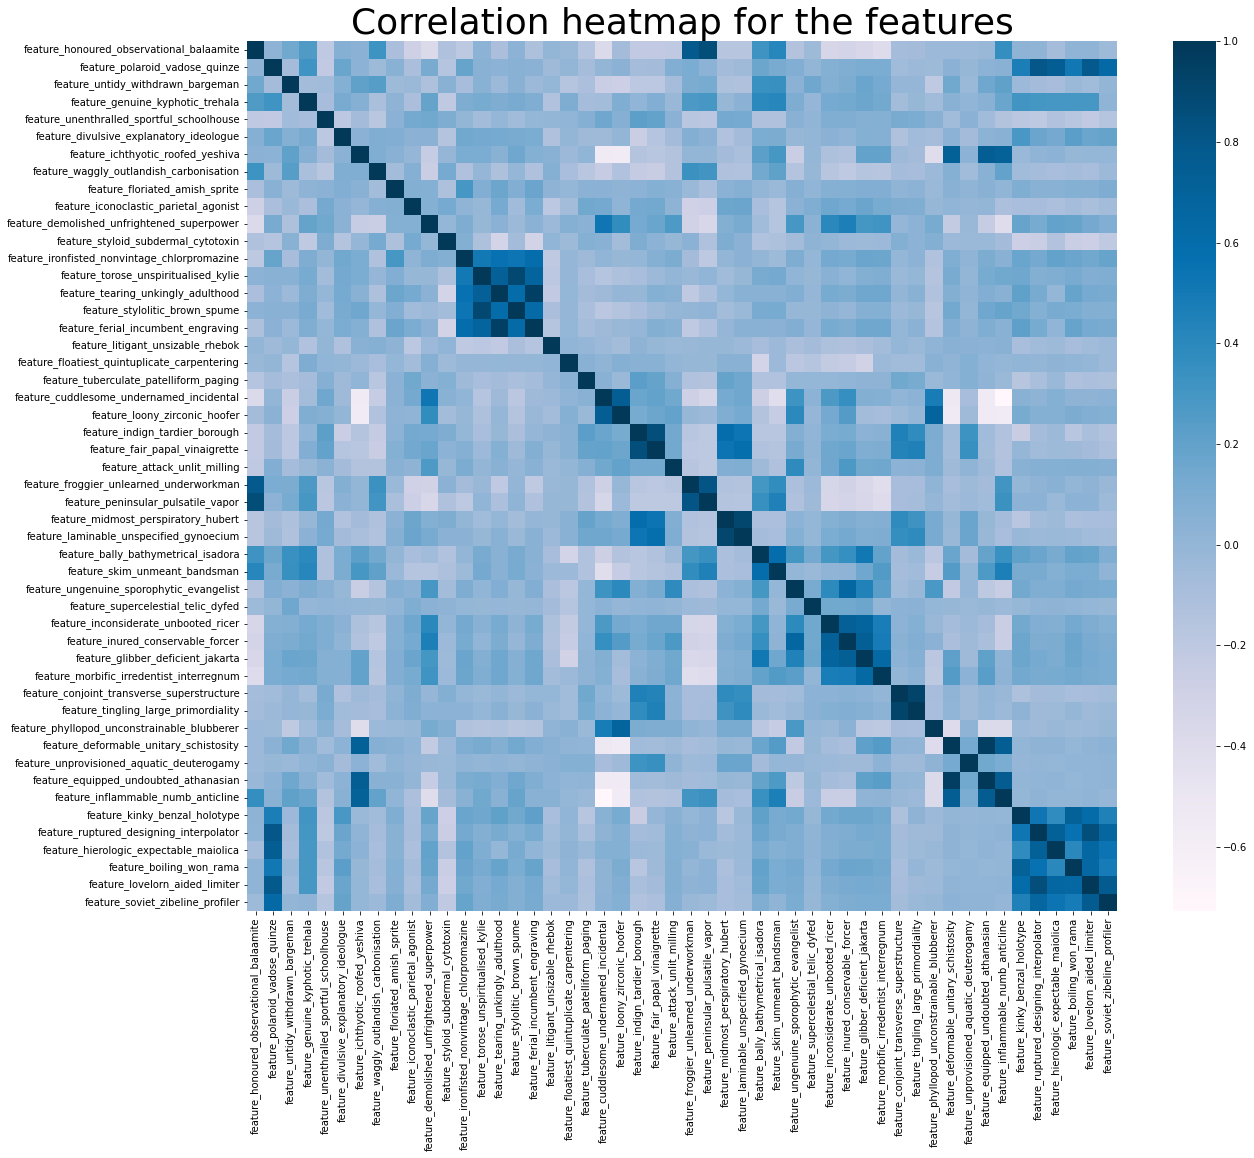

In [10]:
# Heatmap Feature Correlation (only looking at the first 25 features)
def heat_mat(df, features):
    # Calculating the correlation
    corrmat = df[features[:50]].corr()

    f, ax = plt.subplots(figsize=(20, 16))

    sns.heatmap(corrmat, square = True, cmap = 'PuBu')
    plt.title('Correlation heatmap for the features', fontsize=36)

heat_mat(era_df, features)

plt.savefig('photo/features_heatmap_pic.png')

Plot shows the correlation between features -- dark blue => high correlation

<AxesSubplot:xlabel='target_alan_v4_60', ylabel='feature_torose_unspiritualised_kylie'>

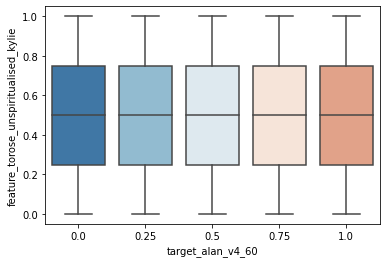

In [11]:
sns.set_palette('RdBu_r')
sns.boxplot(data = era_df, y='feature_torose_unspiritualised_kylie', x='target_alan_v4_60')

<AxesSubplot:xlabel='target_thomas_v4_60', ylabel='feature_torose_unspiritualised_kylie'>

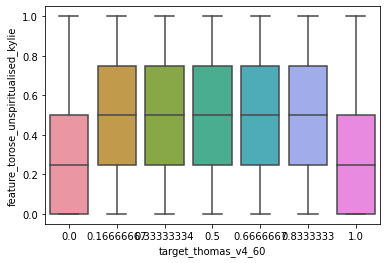

In [12]:
sns.boxplot(data = era_df, y='feature_torose_unspiritualised_kylie', x='target_thomas_v4_60')

/var/folders/_0/541h7pgs06l9wr3xp3jssnsc0000gn/T/ipykernel_27491/3543386546.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


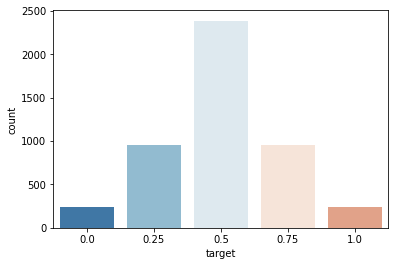

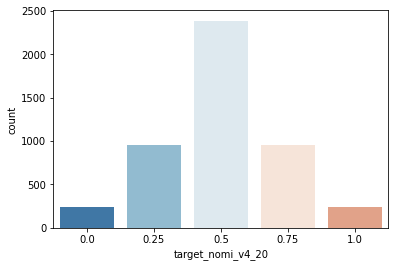

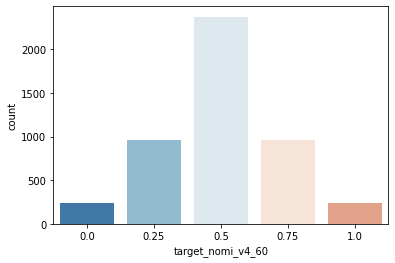

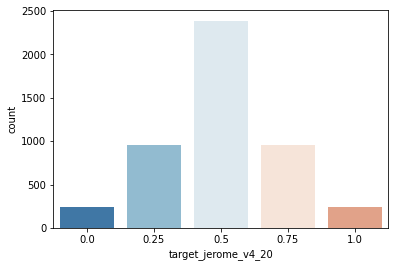

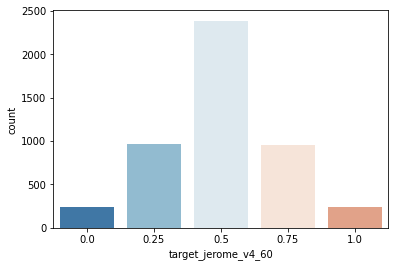

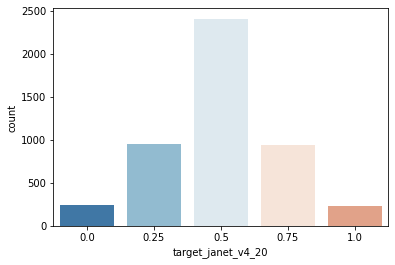

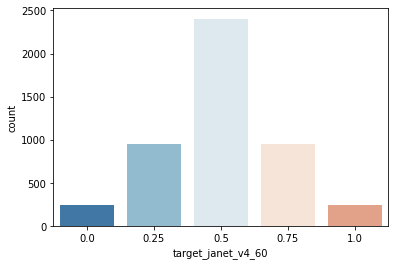

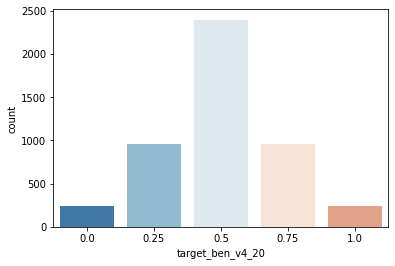

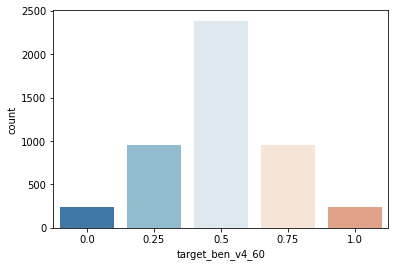

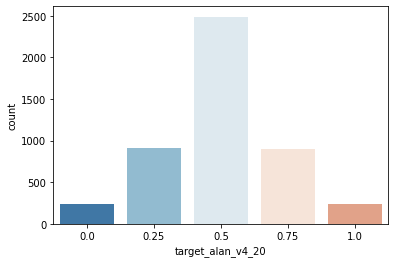

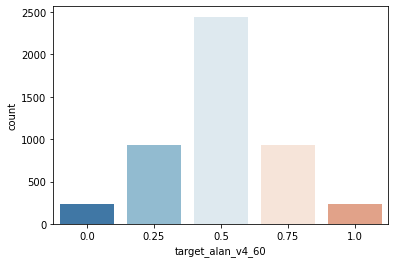

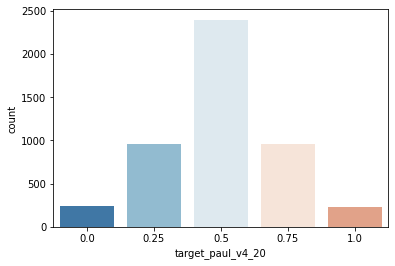

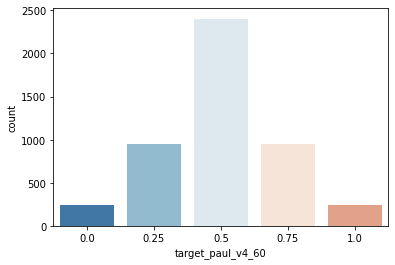

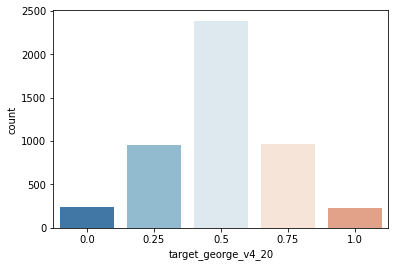

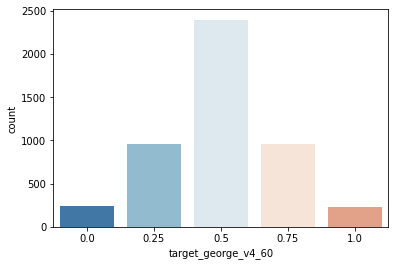

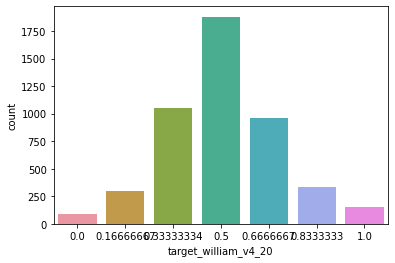

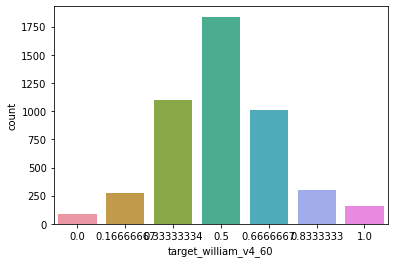

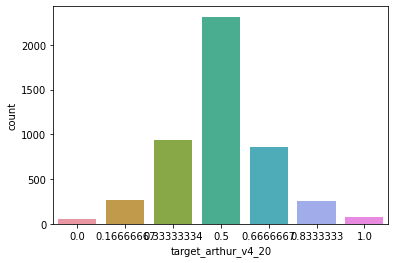

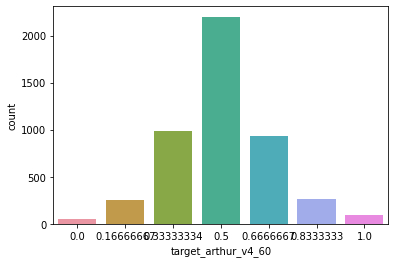

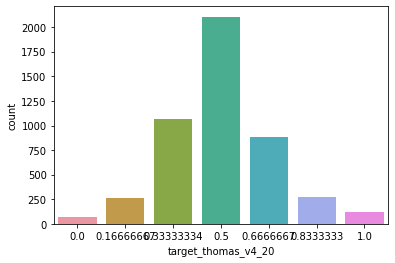

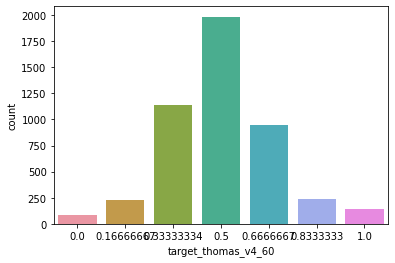

In [13]:
# Countplot Targets
def plot_target_correlation(df, targets):
    for i, col in enumerate(targets):
        plt.figure(i)
        sns.countplot(x=col, data=df)

plot_target_correlation(era_df, targets)

In [14]:
def linear_reg(era_df, targets, features):

    linreg_acc_score_list = []
    X = era_df[features]
    
    for i in range(len(targets)):
        
        y = era_df[targets[i]]  # Loop through all targets
        y = y.replace(np.nan, 0)     # Drop null items

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Define model
        lin_model = LinearRegression()
        # Fit training data to model
        lin_model.fit(X_train, y_train)

        # Predict on test set
        y_pred = lin_model.predict(X_test)
        # Getting accuracy score (using r2_score metric)
        acc_score = r2_score(y_test, y_pred)
        
        # Append item to the score list
        linreg_acc_score_list.append(acc_score)

    return linreg_acc_score_list

In [15]:
def knn_classifier_score(era_df, targets, features):
    knn_acc_score_list = []
    X = era_df[features]
    
    for i in range(len(targets)):
        
        y = era_df[targets[i]]  # Loop through all targets
        y = y.replace(np.nan, 0)     # Drop null items

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        lab_enc = preprocessing.LabelEncoder()
        y_train_encoded = lab_enc.fit_transform(y_train)  # Encoded cuz getting 'continuous' variable error
        y_test_encoded = lab_enc.fit_transform(y_test)    # Encoded cuz getting 'continuous' variable error

        # Using Euclidean metric for K-Nearest Neighbor
        # Define model
        knn = KNeighborsClassifier(n_neighbors=100, weights='distance', metric='euclidean', n_jobs=-1)
        # Fit training data to model
        knn.fit(X_train, y_train_encoded)

        # Predict on test set
        y_pred = knn.predict(X_test)
        # Getting accuracy score (using accuracy_score metric)
        acc_score = accuracy_score(y_test_encoded, y_pred)
        
        # Append item to the score list
        knn_acc_score_list.append(acc_score)

    return knn_acc_score_list


In [16]:
era_df

,era,data_type,feature_honoured_observational_balaamite,feature_polaroid_vadose_quinze,feature_untidy_withdrawn_bargeman,feature_genuine_kyphotic_trehala,feature_unenthralled_sportful_schoolhouse,feature_divulsive_explanatory_ideologue,feature_ichthyotic_roofed_yeshiva,feature_waggly_outlandish_carbonisation,...,target_paul_v4_20,target_paul_v4_60,target_george_v4_20,target_george_v4_60,target_william_v4_20,target_william_v4_60,target_arthur_v4_20,target_arthur_v4_60,target_thomas_v4_20,target_thomas_v4_60
id,,,,,,,,,,,,,,,,,,,,,
n000101811a8a843,0575,validation,0.50,0.00,1.00,0.00,0.75,0.00,1.00,0.25,...,0.50,0.50,0.50,0.50,0.666667,0.500000,0.500000,0.500000,0.666667,0.500000
n001e1318d5072ac,0575,validation,0.25,1.00,0.50,0.50,0.25,0.75,0.75,0.00,...,0.00,0.25,0.00,0.50,0.166667,0.333333,0.333333,0.166667,0.166667,0.333333
n002a9c5ab785cbb,0575,validation,0.25,0.50,0.50,0.75,0.25,0.25,0.75,0.00,...,0.50,0.75,0.50,0.75,0.500000,0.666667,0.500000,0.666667,0.500000,0.666667
n002ccf6d0e8c5ad,0575,validation,0.50,1.00,0.50,1.00,0.50,1.00,0.75,0.50,...,0.25,0.00,0.25,0.00,0.166667,0.166667,0.333333,0.500000,0.333333,0.166667
n0051ab821295c29,0575,validation,0.50,0.00,0.00,0.25,0.00,1.00,0.50,0.25,...,0.50,0.50,0.50,0.50,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffd46d12142d65e,0575,validation,0.75,0.25,1.00,0.00,0.75,0.50,0.00,0.25,...,0.50,0.50,0.50,0.50,0.500000,0.500000,0.333333,0.500000,0.333333,0.500000
nffdcdda19649863,0575,validation,0.00,0.75,0.50,0.50,0.50,0.75,0.75,0.50,...,0.50,0.50,0.50,0.50,0.500000,0.500000,0.333333,0.500000,0.500000,0.500000
nfff40f4a726b37b,0575,validation,0.75,0.00,0.50,0.25,0.25,0.75,0.25,1.00,...,0.50,0.25,0.25,0.25,0.500000,0.333333,0.500000,0.333333,0.333333,0.166667


In [17]:
era_df['era'].unique()

array(['0575'], dtype=object)

In [18]:
knn_score_df = pd.DataFrame(targets, columns=['Targets'])
# KNN Classifier
era_list = era_df['era'].unique()
# Looping thru all the chosen eras
for i in range(len(era_list)):  
  
  era_name = era_list[i]
  # Looking at the era column
  individual_era_df = era_df.loc[era_df['era'] == era_name]

  # create era name for dataframe later
  col_name = "era " + era_name

  # Getting accuracy score list
  knn_score_list = knn_classifier_score(individual_era_df, targets, features)
  # Add the list as a new column in the dataframe
  knn_score_df[col_name] = knn_score_list

In [19]:
# Look at the result that we have as a dataframe
print("KNN Accuracy Score")
knn_score_df

KNN Accuracy Score


,Targets,era 0575
0,target,0.487448
1,target_nomi_v4_20,0.487448
2,target_nomi_v4_60,0.482566
3,target_jerome_v4_20,0.479777
4,target_jerome_v4_60,0.490237
5,target_janet_v4_20,0.494421
6,target_janet_v4_60,0.472803
7,target_ben_v4_20,0.479777
8,target_ben_v4_60,0.492329
9,target_alan_v4_20,0.514644


In [20]:
# Linear Regression 
linreg_score_df = pd.DataFrame(targets, columns=['Targets'])

# Looping thru all the chosen eras
for i in range(len(era_list)):

  era_name = era_list[i]
  # Looking at the era column
  individual_era_df = era_df.loc[era_df['era'] == era_name]    

  # create era name for dataframe later
  col_name = "era " + era_list[i]

  # Getting R2 Score list
  linReg_score_list = linear_reg(individual_era_df, targets, features)
  # Add the list as a new column in the dataframe
  linreg_score_df[col_name] = linReg_score_list

In [21]:
# Look at the result that we have as a dataframe
print("LinReg R2 Score")
linreg_score_df

LinReg R2 Score


,Targets,era 0575
0,target,-0.398371
1,target_nomi_v4_20,-0.398371
2,target_nomi_v4_60,-0.485296
3,target_jerome_v4_20,-0.378894
4,target_jerome_v4_60,-0.580844
5,target_janet_v4_20,-0.779909
6,target_janet_v4_60,-0.904247
7,target_ben_v4_20,-0.425177
8,target_ben_v4_60,-0.547084
9,target_alan_v4_20,-0.851471
